In [12]:
#Importing Pacakages

import pandas as pd #Data Processing
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # for Visualization of data

import warnings
warnings.filterwarnings('ignore')


In [13]:
#Import the dataset

df = pd.read_csv('creditcard.csv')

print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### I have a look at the number of abnormal and normal cases in our dataset as well as  also calculate the percentage of abnormal cases and normal cases in the total number of recorded transactions. 



In [14]:

cases = len(df)

abnormal_count = len(df[df.Class == 1])
normal_count = len(df[df.Class == 0])

abnormal_percentage = round(abnormal_count/cases*100,2)
normal_percentage = round(normal_count/cases*100,2)

print("Total Number of Transactions is : ",cases,"\n")

print("Total Number of Abnoramal Transactions is : ",abnormal_count)
print("Total Number of Normal Transactions is : ",normal_count,"\n")

print("Percentage Abnormal Transaction is : ",abnormal_percentage)
print("Percentage of Normal Transaction is : ",normal_percentage)



Total Number of Transactions is :  284807 

Total Number of Abnoramal Transactions is :  492
Total Number of Normal Transactions is :  284315 

Percentage Abnormal Transaction is :  0.17
Percentage of Normal Transaction is :  99.83


### There are just 492 abnormal incidents out of 284,807 samples, or 0.17 percent of all samples. As a result, I may conclude that the data I am working with is very unbalanced and must be treated with caution while modelling and assessing it. 

### The following line of code can be used to check for null values.

In [6]:
df.isnull().values.any()

False

### In the credit card dataset, look for null values. Fortunately, our dataset contains no null values.

### Checking the frequncy of frauds

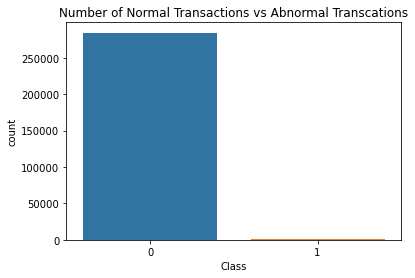

In [15]:
#Bar plot for the number of Normal Transactions vs Abnormal Transcations
sns.countplot(x='Class', data=df)
plt.title('Number of Normal Transactions vs Abnormal Transcations')
plt.show()

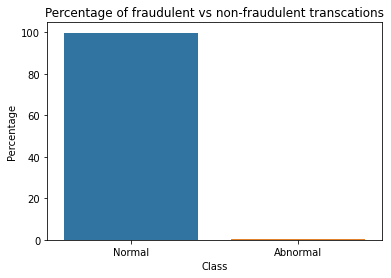

In [8]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud = {'Class':['Normal', 'Abnormal'], 'Percentage':[normal_percentage, abnormal_percentage]} 
df_fraud = pd.DataFrame(fraud) 
sns.barplot(x='Class',y='Percentage', data=df_fraud)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()



In [ ]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)

### The "Amount" feature is the one I was most interested in. The following is a summary of the feature.

In [9]:
nonfraud_count = df[df.Class == 0]
fraud_count = df[df.Class == 1]

print("Normal transaction statistics \n")
print(nonfraud_count.Amount.describe(),"\n")

print("Abnormal transaction statistics \n ")
print(fraud_count.Amount.describe())

Normal transaction statistics 

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64 

Abnormal transaction statistics 
 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


## Checking the distribution of amount

<AxesSubplot:xlabel='Amount', ylabel='Density'>

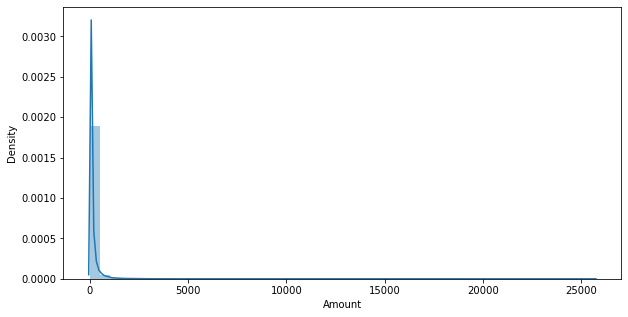

In [42]:
plt.figure(figsize=(10, 5))
sns.distplot(df.Amount)



#### It is difficult to understand so we will make some easyness for understanding by adding new feature "Bins"

In [17]:
df['Amount Bins'] = ''

In [34]:
def bins(predictor, size=50):
    '''
    Takes the predictor (a series or a dataframe of single predictor) and size of bins
    Returns bins and bin labels
    '''
    bins = np.linspace(predictor.min(), predictor.max(), num=size)

    bins_labels = []

    # Index of the final element in bins list
    bins_last_index = bins.shape[0] - 1

    for id, val in enumerate(bins):
        if id == bins_last_index:
            continue
        val_to_put = str(int(bins[id])) + ' to ' + str(int(bins[id + 1]))
        bins_labels.append(val_to_put)
    
    return bins, bins_labels
bins, bins_labels = bins(df.Amount, size=10)

### Now, adding bins in the column Amount-Bins.

In [35]:
df['Amount Bins'] = pd.cut(df.Amount, bins=bins,
                           labels=bins_labels, include_lowest=True)
df['Amount Bins'].head().to_frame()

,Amount Bins
0,0 to 2854
1,0 to 2854
2,0 to 2854
3,0 to 2854
4,0 to 2854


### Let's plot the bins.

In [36]:
df['Amount-Bins'].value_counts()

0 to 2854         284484
2854 to 5709         285
5709 to 8563          28
8563 to 11418          4
11418 to 14272         3
17127 to 19982         2
22836 to 25691         1
19982 to 22836         0
14272 to 17127         0
Name: Amount-Bins, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

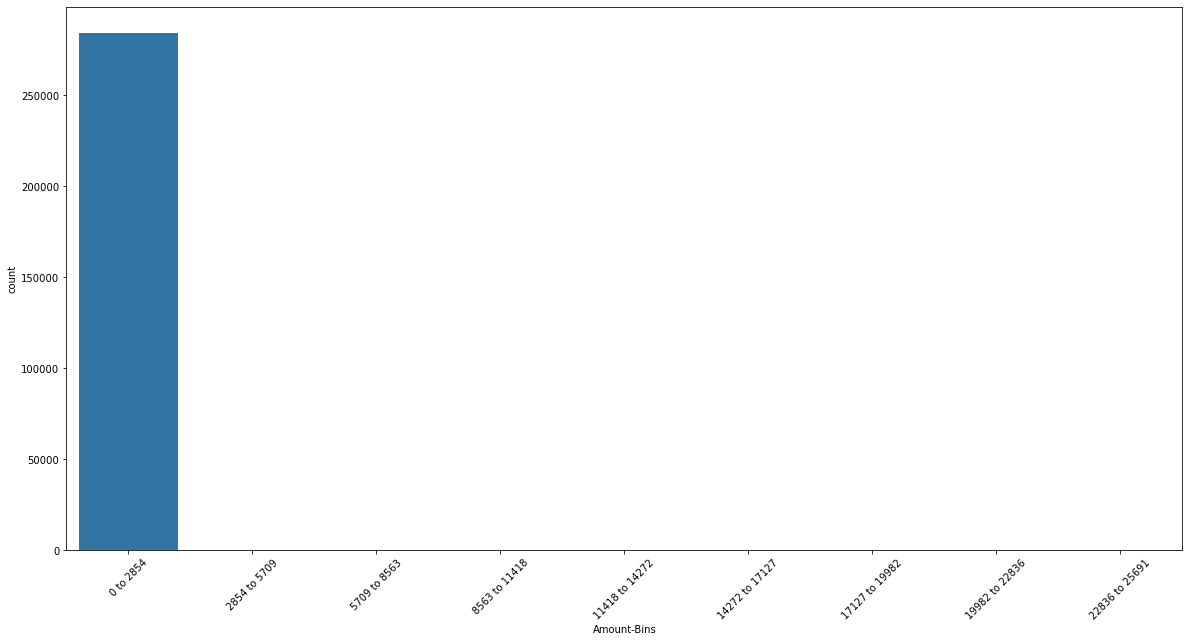

In [38]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Amount-Bins', data=df)
plt.xticks(rotation=45)

### Since, count of values of Bins other than '0 to 2854' are difficult to view. Let's not insert the first one.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '0 to 2854'),
  Text(1, 0, '2854 to 5709'),
  Text(2, 0, '5709 to 8563'),
  Text(3, 0, '8563 to 11418'),
  Text(4, 0, '11418 to 14272'),
  Text(5, 0, '14272 to 17127'),
  Text(6, 0, '17127 to 19982'),
  Text(7, 0, '19982 to 22836'),
  Text(8, 0, '22836 to 25691')])

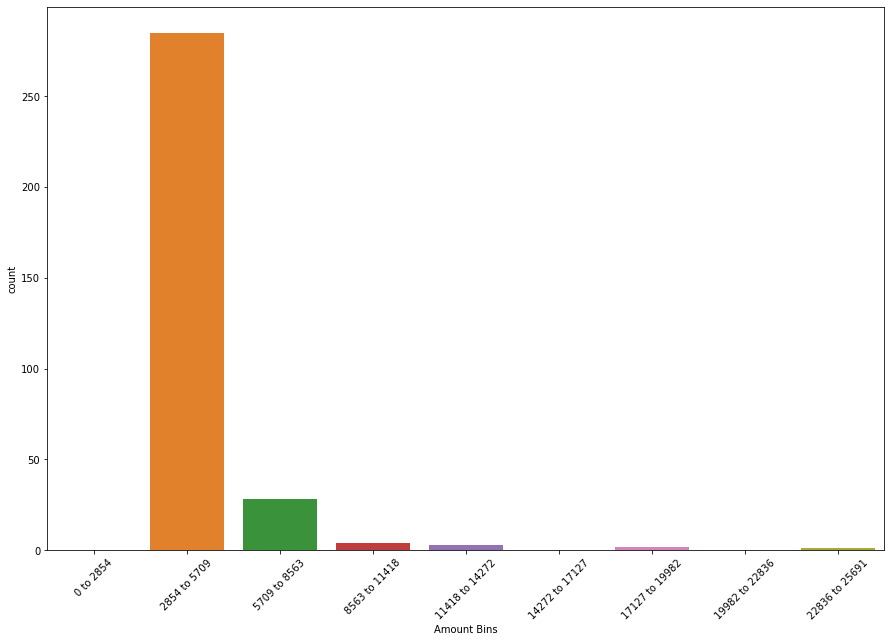

In [39]:
plt.figure(figsize=(15, 10))
sns.countplot(x='Amount Bins', data=df[~(df['Amount-Bins'] == '0 to 2854')])
plt.xticks(rotation=45)

## One-hot encoding the Amount-Bins
Since, for classification, we need to pass the data in numerical form. That's why we need to One-Hot encode the Amount-Bins column.
Note: We can also label encode values.

In [40]:
df_encoded = pd.get_dummies(data=df, columns=['Amount-Bins'])
df = df_encoded.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,Amount Bins,Amount-Bins_0 to 2854,Amount-Bins_2854 to 5709,Amount-Bins_5709 to 8563,Amount-Bins_8563 to 11418,Amount-Bins_11418 to 14272,Amount-Bins_14272 to 17127,Amount-Bins_17127 to 19982,Amount-Bins_19982 to 22836,Amount-Bins_22836 to 25691
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0 to 2854,1,0,0,0,0,0,0,0,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0 to 2854,1,0,0,0,0,0,0,0,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0 to 2854,1,0,0,0,0,0,0,0,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0 to 2854,1,0,0,0,0,0,0,0,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0 to 2854,1,0,0,0,0,0,0,0,0


### Keep track of the class distribution over time.  


In [25]:
# Creating Abnormal dataframe
data_abnormal = df[df['Class'] == 1]
# Creating Normal dataframe
data_normal = df[df['Class'] == 0]

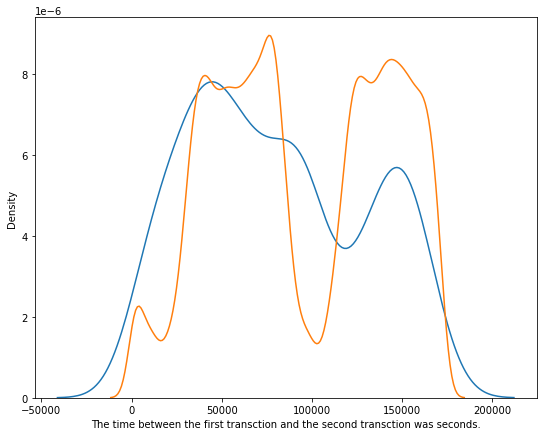

In [26]:
# Distribution plot
plt.figure(figsize=(9,7))
ax = sns.distplot(data_abnormal['Time'],label='Abnormal',hist=False)
ax = sns.distplot(data_normal['Time'],label='Normal',hist=False)
ax.set(xlabel='The time between the first transction and the second transction was seconds.')
plt.show()

#### Interpretation :  In terms of Time, we don't find any distinct trend between abnormal and normal transactions. As a result, the Time column can be removed.



In [27]:
# Dropping the Time column
a=df.drop(['Time'], axis=1)
a

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Keep track of the class distribution over amount.  

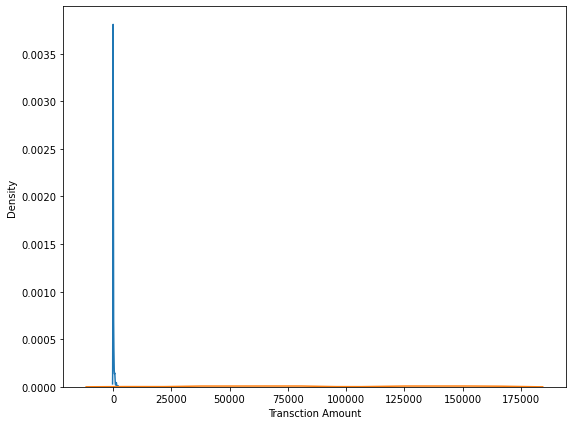

In [28]:
# Distribution plot
plt.figure(figsize=(9,7))
ax = sns.distplot(data_abnormal['Amount'],label='Abnormal',hist=False)
ax = sns.distplot(data_normal['Time'],label='Normal',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

#### Interpretation : We can observe that abnormal transactions are largely concentrated in the lower value range, but normal transactions are scattered throughout the low to high amount range.

<AxesSubplot:>

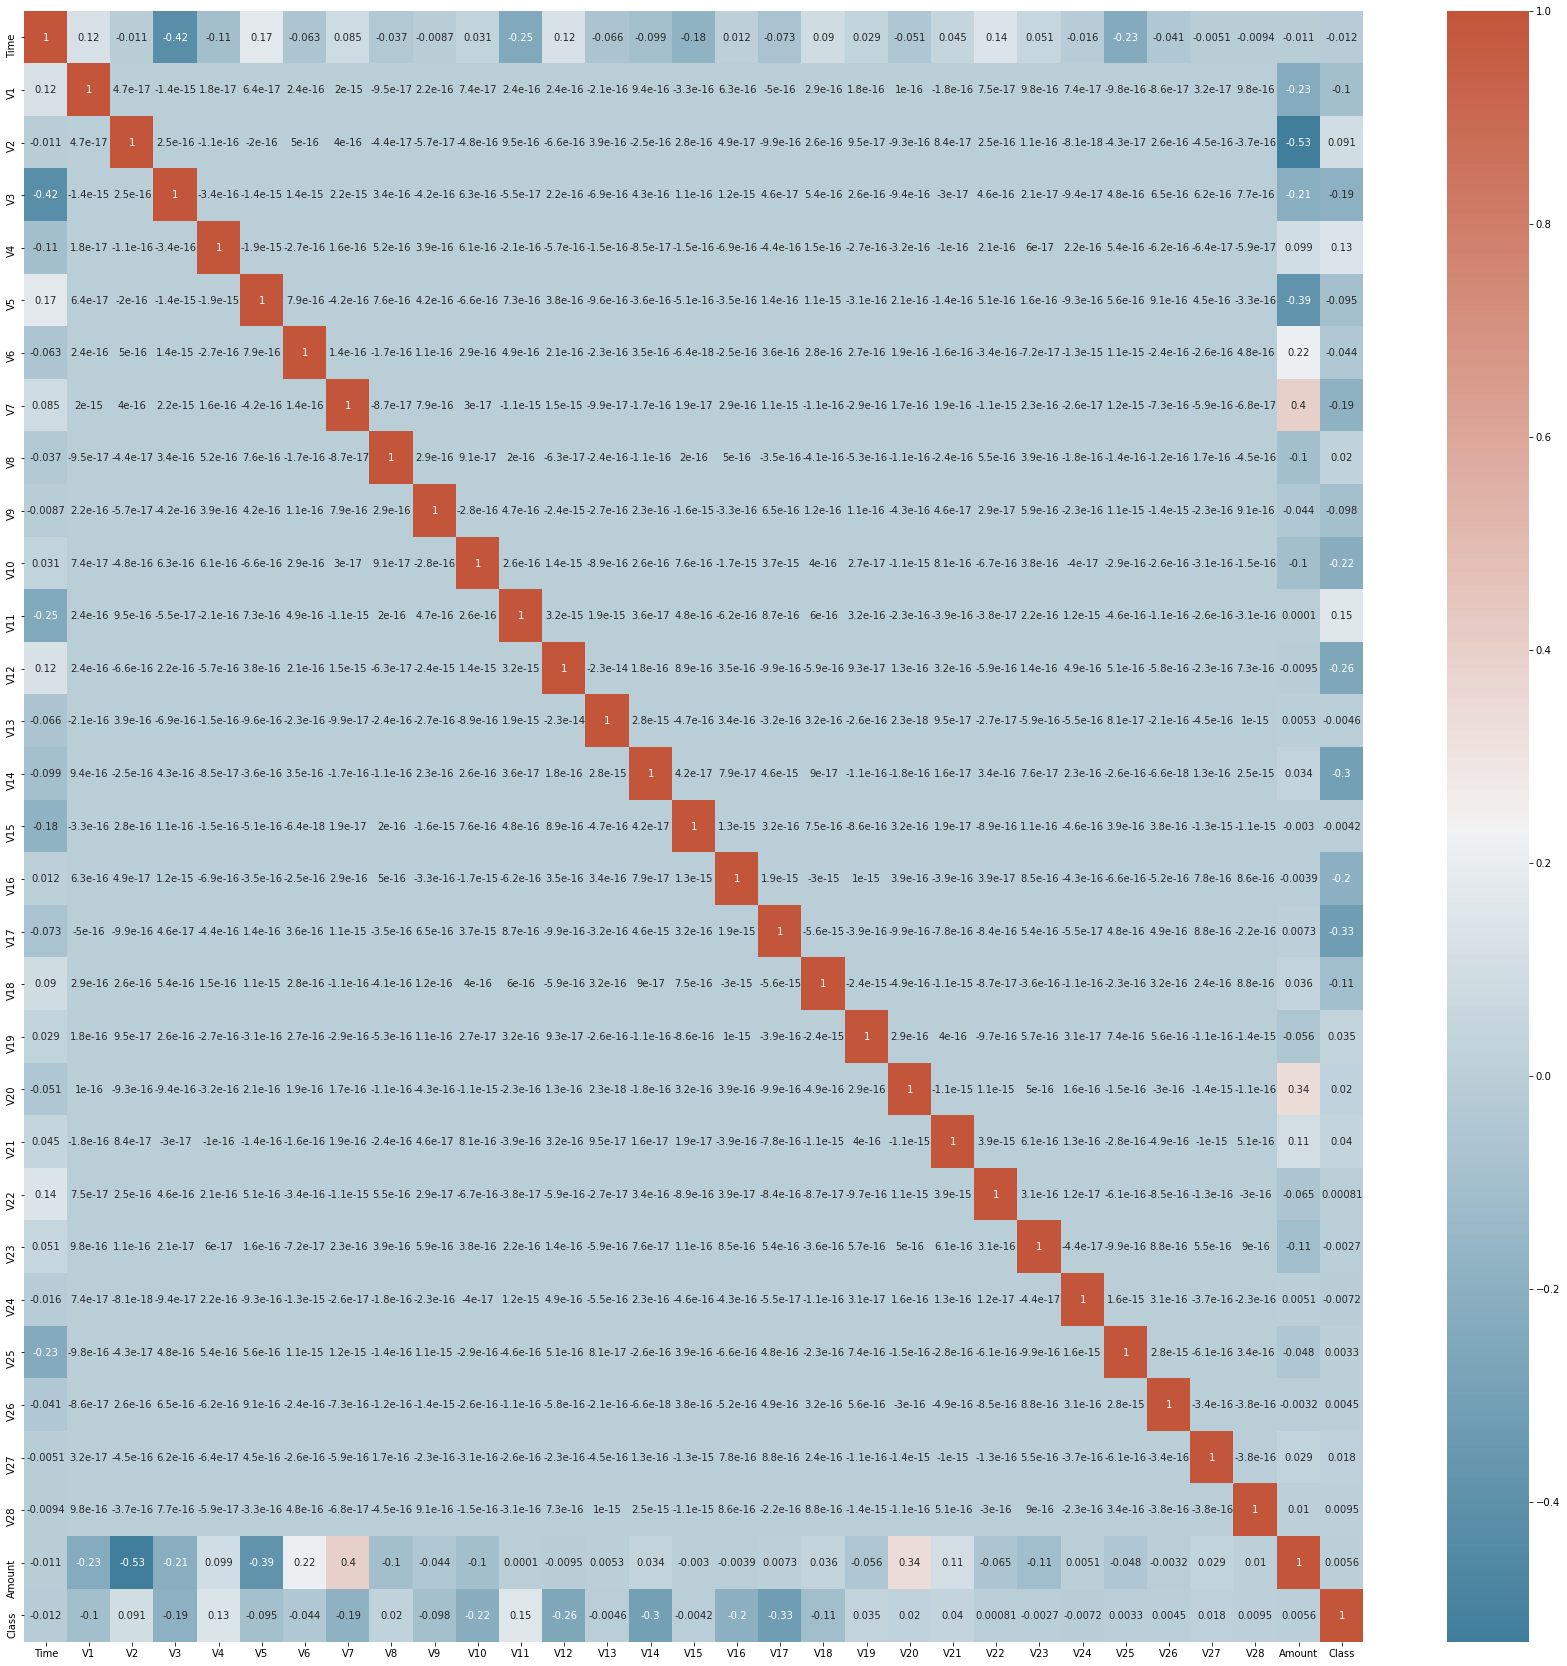

In [46]:
corr = df.corr()

# Set up the matplotlib plot configuration

ax = plt.subplots(figsize=(30, 30))

#Draw the heatmap

sns.heatmap(corr, annot=True, cmap=cmap)

# corr = df.corr()
# top_cor_mat = corr.index
# plt.figure(figsize=(30,30))
# g=sns.heatmap(df[top_cor_mat].corr(),annot=True,cmap=cmap)

# Train-Test Split

In [47]:
# Import library
from sklearn.model_selection import train_test_split

# Using X to store feature variables
X = df.drop(['Class'], axis=1)

# Changing the value of the target variable to y
y = df['Class']

# # 80:20 data split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Scaling of Features

#### Only the Amount column needs to be scaled because the PCA transformation has already scaled all of the other columns.

In [24]:
# Standardization method
from sklearn.preprocessing import StandardScaler

# Instantiate the Scaler
scaler = StandardScaler()

# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])


X_train.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,134039.0,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,...,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,124044.0,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,...,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,54997.0,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,...,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,137226.0,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,...,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,136246.0,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,...,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


In [26]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,43906.0,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,...,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,1.99
154704,102638.0,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,...,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,6.99
67247,52429.0,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,...,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,306.16
251657,155444.0,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,...,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,0.99
201903,134084.0,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,...,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,30.27
